In [40]:
# Load data
from sklearn.datasets import load_wine
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

d = load_wine()
x = d['data']
y = d['target']

y[y==2] = 1

x = np.random.randn(100,3)*1+[3,5,1]
x = np.concatenate([x, np.random.randn(100,3)*1+[-6, 5, -1]])
y=np.concatenate([np.zeros(100),np.ones(100)])

y[y==0]=-1


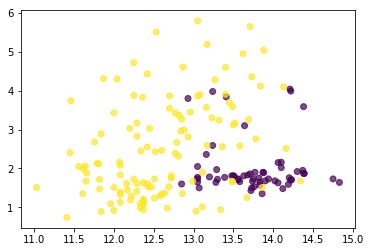

In [18]:
plt.scatter(x[:,0], x[:,1], c=y, alpha=0.7)

In [19]:
# Linear program SVM
# Linear programming support vector machines
# Weida Zhou∗, Li Zhang, Licheng Jiao

In [41]:
from scipy.optimize import linprog
class lp_svm():
    def __init__(self):
        pass
    
    def get_mats(self, x, y, lamb):
        m, n = x.shape
        f = np.squeeze(np.concatenate([np.zeros((n,1)), np.ones((n,1)), lamb*np.ones((m,1)), [[0]]]))
        main_constraints = np.concatenate([np.diag(-y).dot(x), np.zeros((m,n)), -np.eye(m), -y.reshape((-1,1))], axis=1)
        w_less_t = np.concatenate([np.eye(n),-np.eye(n), np.zeros((n,m)), np.zeros((n,1))], axis=1)
        minus_w_less_t = np.concatenate([-np.eye(n),-np.eye(n), np.zeros((n,m)), np.zeros((n,1))], axis=1)

        A = np.concatenate([main_constraints, w_less_t, minus_w_less_t])
        b = np.squeeze(np.concatenate([-np.ones((m,1)), np.zeros((2*n,1))]))

        bounds = np.zeros((2, 2*n+1+m))
        bounds[0,:] = np.concatenate([n*[-np.inf], n*[-np.inf], m*[0], [-np.inf]])
        bounds[1,:] = np.concatenate([n*[np.inf], n*[np.inf], m*[np.inf], [np.inf]])    
        bounds = tuple(map(tuple, bounds.T))
         
        return f, A, b, bounds
    
    def fit(self, x, y, lamb=0.5, p_w=np.empty(0)):
        c, A, b, bounds = self.get_mats(x, y, lamb)
        res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, options=dict(tol=1e-8))
        m, n = x.shape
        self.w = res.x[0:n]
        self.b = res.x[-1]
        self.A = A
        self.c = c
        self.epsilons = res.x[n+1:-1]
        self.r = res.x[n]
        self.res = res
    
    def predict(self, x):
        return 2*(x.dot(self.w)+self.b>0)-1

In [42]:
l = lp_svm()
l.fit(x, y, lamb=.5)
l.predict(x)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

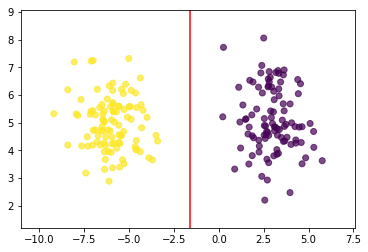

In [43]:
m, n = x.shape
w = l.w+0.00000000001
b = l.b

x_p = np.linspace(min(x[:,0])-1,max(x[:,0])+1,100)
y_p = (-x_p*w[0]-b)/w[1]

plt.scatter(x[:,0], x[:,1], c=y, alpha=0.7)
plt.plot(x_p, y_p, '-r')
plt.ylim([min(x[:,1])-1, max(x[:,1])+1])
plt.show()

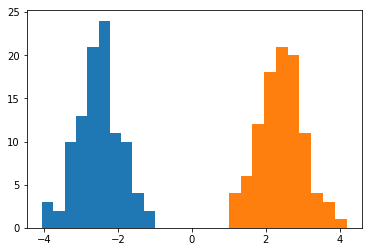

In [44]:
x_svm = x.dot(l.w)+l.b
for i in np.unique(y):
    plt.hist(x_svm[np.where(y==i)])
plt.show()


In [45]:
l.w

array([-5.49977628e-01,  1.77635684e-15,  4.44089210e-16])

In [35]:
l.b

11.506308203139968